# Procedures

## 9.1 Introduction to Matplotlib

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

### Plotting Lines

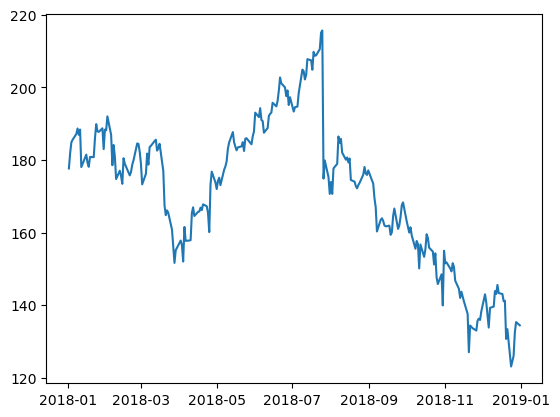

In [6]:
fb = pd.read_csv(
                'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
                )
plt.plot(fb.index, fb.open)
plt.show()


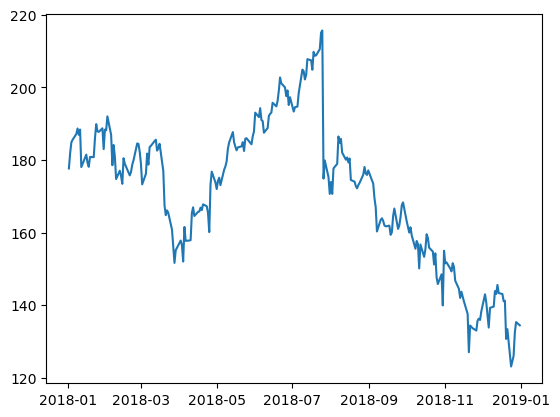

In [8]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
                'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
                )

plt.plot(fb.index, fb.open)
plt.show()

### Scatterplots

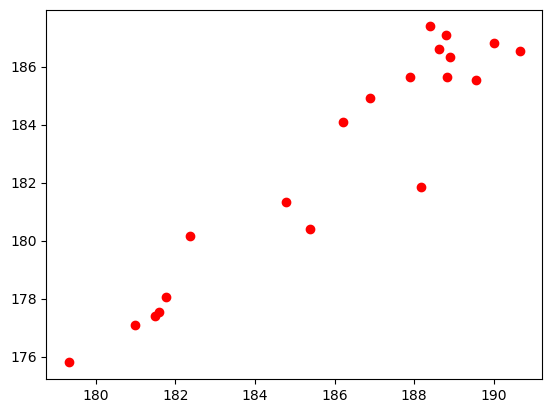

In [10]:
plt.plot('high', 'low', 'ro', data=fb.head(20))
plt.show()

### Histograms

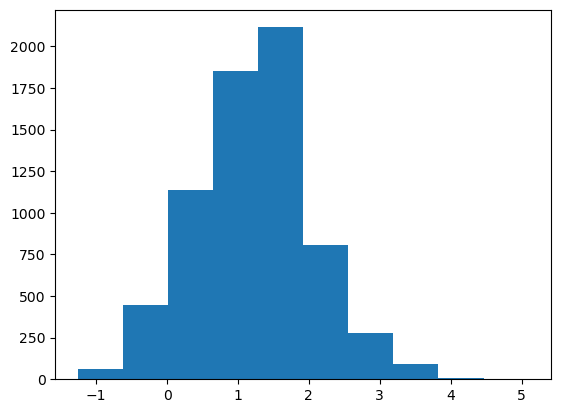

In [12]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)
plt.show()

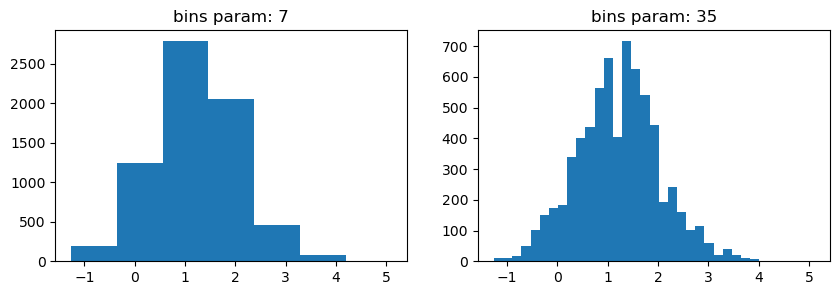

In [52]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))  

for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')
    
plt.show()

### Plot Components

#### Figure

In [54]:
fig = plt.figure()
fig

<Figure size 640x480 with 0 Axes>

#### Axes

<Figure size 640x480 with 0 Axes>

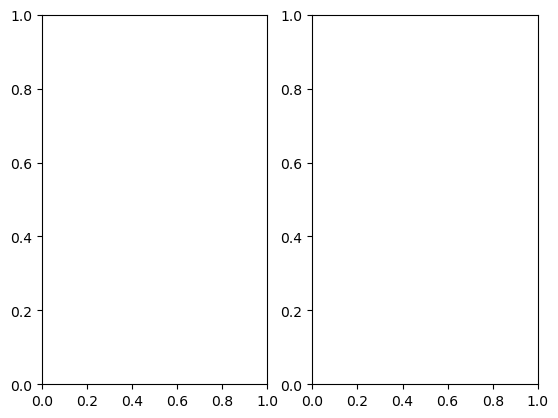

In [57]:
fig, axes = plt.subplots(1, 2)   # (rows, columns) note: axes are one plot not x axis or y axis
plt.show()

### Creating Subplots

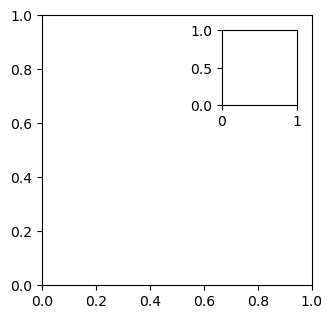

In [59]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])    # fig.add_axes([left, bottom, width, height])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

plt.show()
                

### Creating Plot Layouts with gridspec

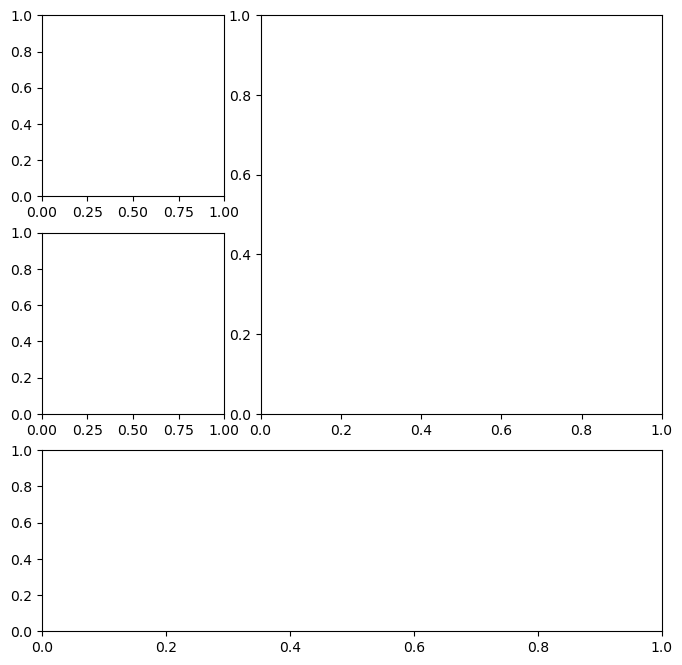

In [67]:
fig = plt.figure(figsize=(8, 8)) # initiate the figure where the grids be placed
gs = fig.add_gridspec(3, 3)      # create a 3x3 grid

top_left = fig.add_subplot(gs[0, 0]) # occupy based on the coordinatesd
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])      #big square
bottom = fig.add_subplot(gs[2,:])            # large rec below

# saving the plot
fig.savefig('empty.png')
plt.show()

### Cleaning up

In [72]:
plt.close('all') # close all figures

### Additional plotting options

#### Specifying figure size

In [82]:
fig = plt.figure(figsize=(10, 4))
fig

<Figure size 1000x400 with 0 Axes>

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) # combined figures and axes in one line of code

#### rcParams

In [88]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.formatter.limits',
 'boxplot.boxprops.color',
 'boxplot.flierprops.markersize',
 'boxplot.meanprops.markerfacecolor',
 'contour.corner_mask',
 'date.autoformatter.hour',
 'date.autoformatter.minute',
 'figure.subplot.top',
 'font.variant',
 'image.interpolation',
 'image.resample',
 'keymap.forward',
 'keymap.grid_minor',
 'pdf.use14corefonts',
 'xtick.minor.pad',
 'yaxis.labellocation',
 'ytick.labelleft',
 'ytick.major.size',
 'ytick.minor.visible']

In [90]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [92]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']


[300.0, 10.0]

In [94]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [96]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default


## 9.2 Plotting with Pandas

### Evolution over time

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

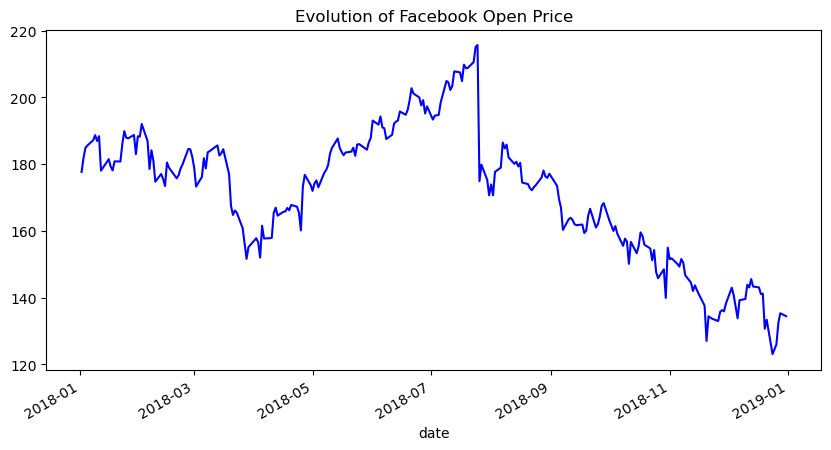

In [106]:
fb.plot(
        kind='line',
        y='open',
        figsize=(10, 5),
        style='b-',
        legend=False,
        title='Evolution of Facebook Open Price'
        )

plt.show()

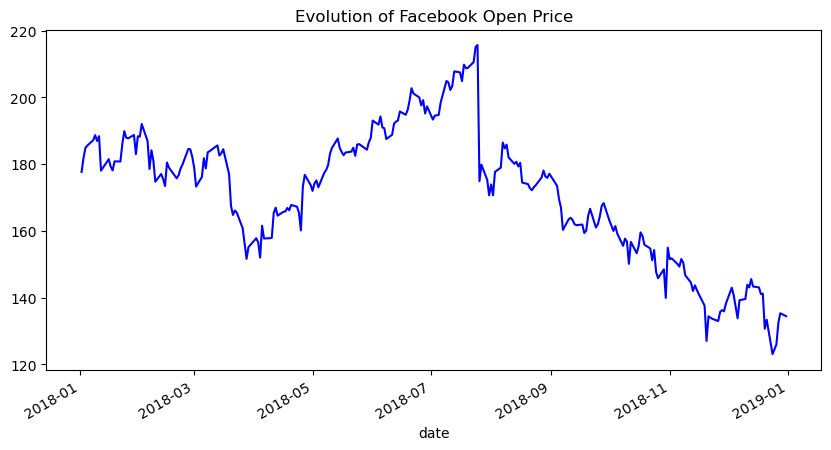

In [114]:
fb.plot(
        kind='line',
        y='open',
        figsize=(10, 5),
        color='blue',
        linestyle='solid',
        legend=False,
        title='Evolution of Facebook Open Price'
        )
plt.show()

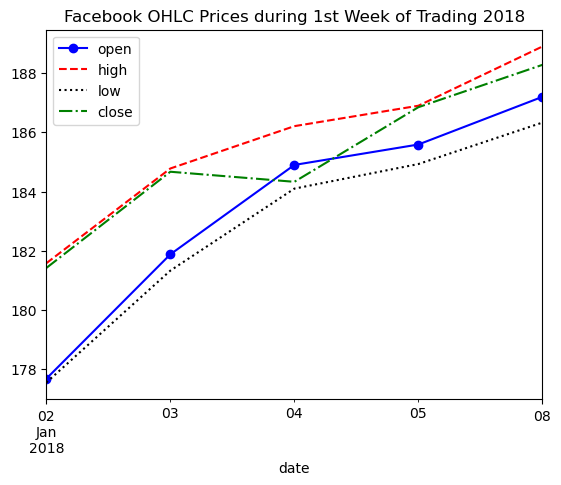

In [120]:
fb.iloc[:5,].plot(
                y=['open', 'high', 'low', 'close'],
                style=['b-o', 'r--', 'k:', 'g-.'],
                title='Facebook OHLC Prices during 1st Week of Trading 2018'
                )
plt.show()

### Creating subplots

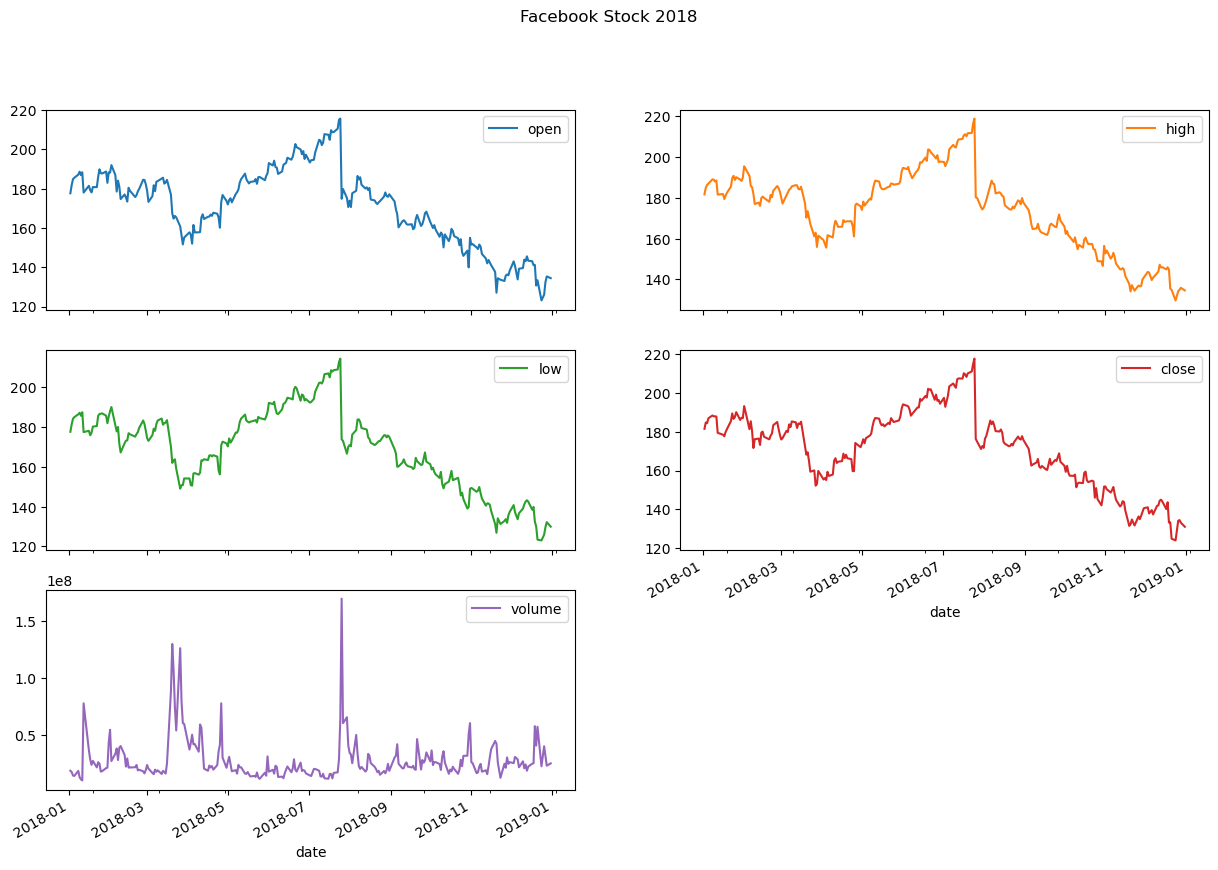

In [127]:
fb.plot(
        kind='line',
        subplots=True,
        layout=(3,2),       # sublots row and columns
        figsize=(15,10),    # size of the whole figure
        title='Facebook Stock 2018'
        )
plt.show()

### Visualizing relationships between variables


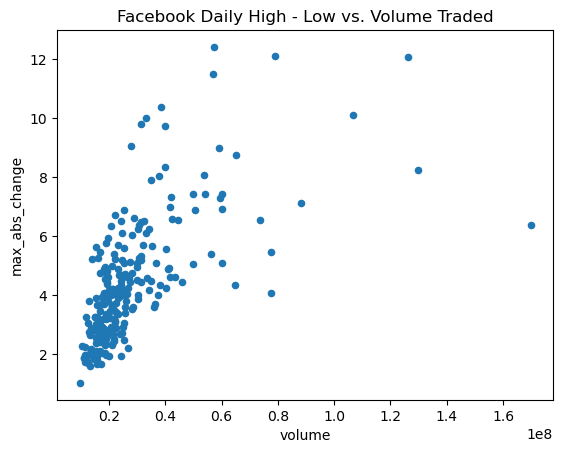

In [134]:
fb.assign(
        max_abs_change=fb.high - fb.low
        ).plot(
            kind='scatter', x='volume', y='max_abs_change',
            title='Facebook Daily High - Low vs. Volume Traded'
            )
plt.show()

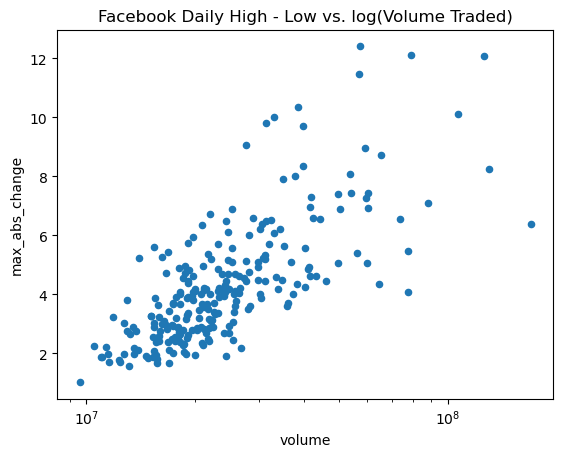

In [136]:
fb.assign(
        max_abs_change=fb.high - fb.low
        ).plot(
            kind='scatter', x='volume', y='max_abs_change',
            title='Facebook Daily High - Low vs. log(Volume Traded)',
            logx=True #to create a same scale of x and y axis
            )
plt.show()

### Adding Transparency to Plots with alpha

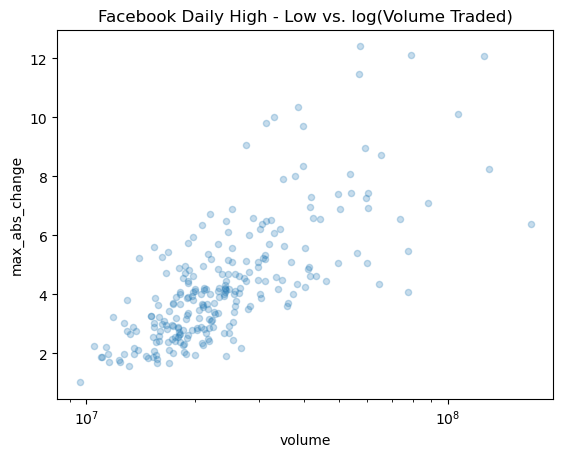

In [145]:
fb.assign(
        max_abs_change=fb.high - fb.low
        ).plot(
            kind='scatter', x='volume', y='max_abs_change',
            title='Facebook Daily High - Low vs. log(Volume Traded)',
            logx=True, alpha=0.25        #this part
            )
plt.show()

### Hexbins

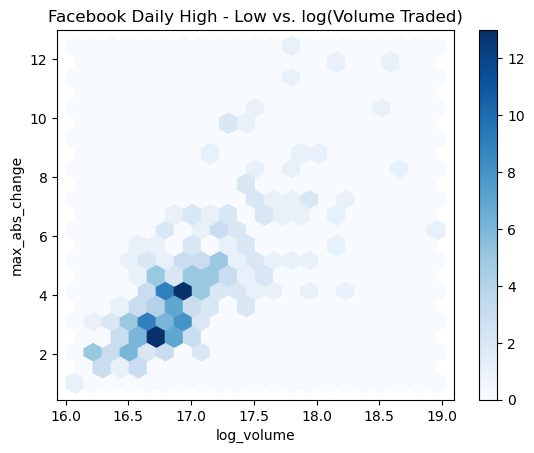

In [174]:
import numpy as np

fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
    ).plot(
        kind='hexbin',      # hexbin
        x='log_volume',
        y='max_abs_change',
        title='Facebook Daily High - Low vs. log(Volume Traded)',
        colormap='Blues',     # the colormap, more saturated more populated and vice versa (changed the color map) 
        gridsize=20,
        sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
        )

plt.show()

### Visualizing Correlations with Heatmaps

C:\Users\Reuel\AppData\Local\Temp\ipykernel_3036\4181175541.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, rotation=45)
C:\Users\Reuel\AppData\Local\Temp\ipykernel_3036\4181175541.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


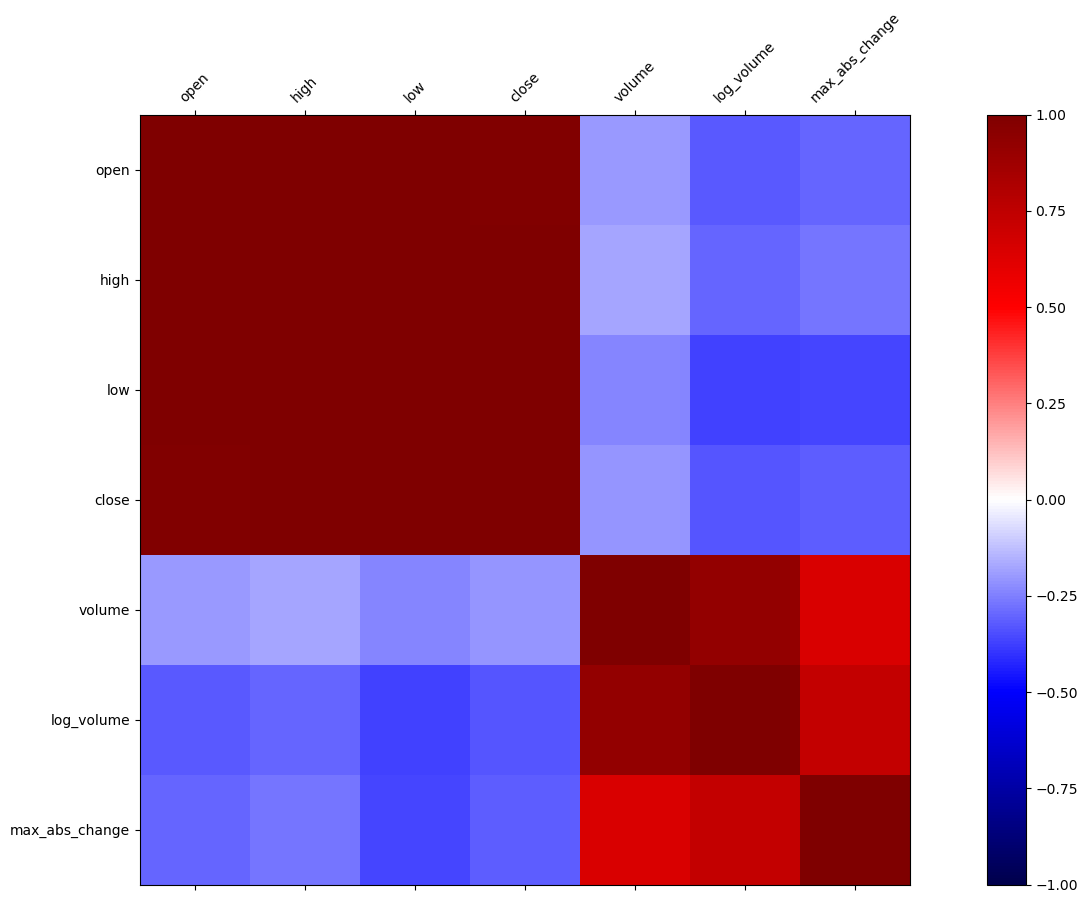

In [185]:
# use matrexes to do heatmaps
fig, ax = plt.subplots(figsize=(20, 10))
fb_corr = fb.assign(
                    log_volume=np.log(fb.volume),
                    max_abs_change=fb.high - fb.low
                    ).corr()

im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

plt.show()

### Visualizing distributions

#### Histogram

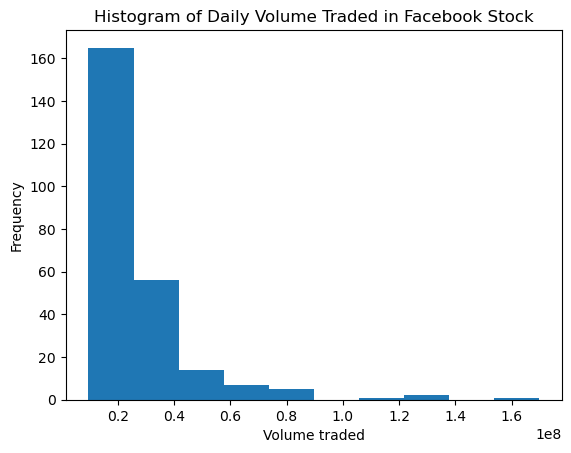

In [190]:
fb.volume.plot(
kind='hist',
title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)
plt.show()

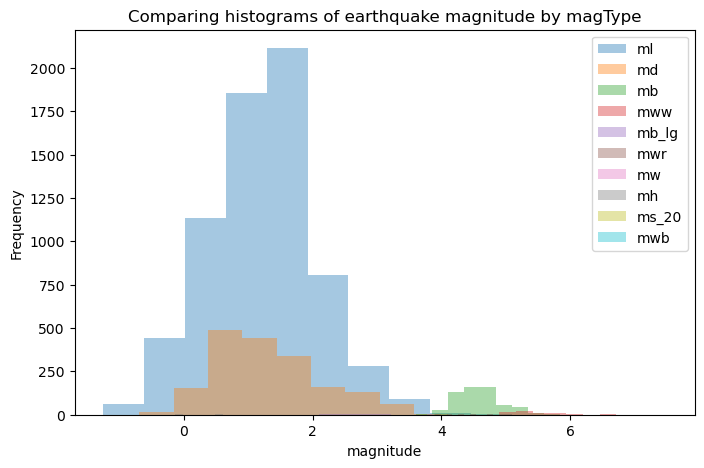

In [200]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():              #plot all the unique values using transparency
    data = quakes.query(f'magType == "{magtype}"').mag
    
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4,
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
            )
    
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

plt.show()

#### Kernel Density Estimation (KDE)

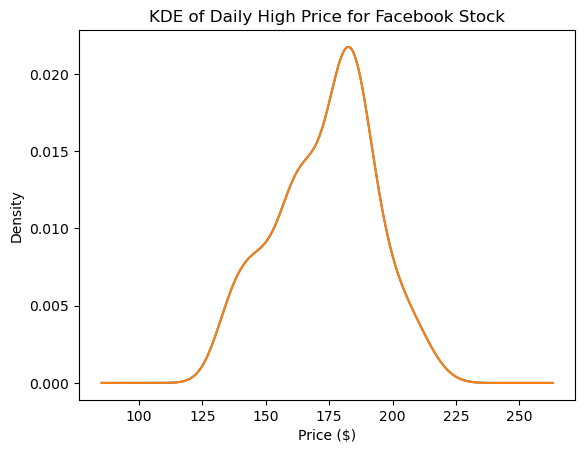

In [207]:
fb.high.plot(
        kind='kde',
        title='KDE of Daily High Price for Facebook Stock'
        )

plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

### Adding to the result of plot()

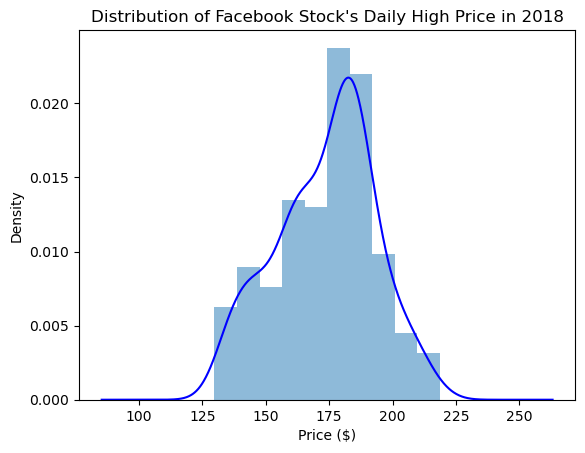

In [210]:
#do one plot first then plot another to do an overlap
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)

fb.high.plot(
            ax=ax, kind='kde', color='blue',
            title='Distribution of Facebook Stock\'s Daily High Price in 2018'
            )

plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

### Plotting the ECDF

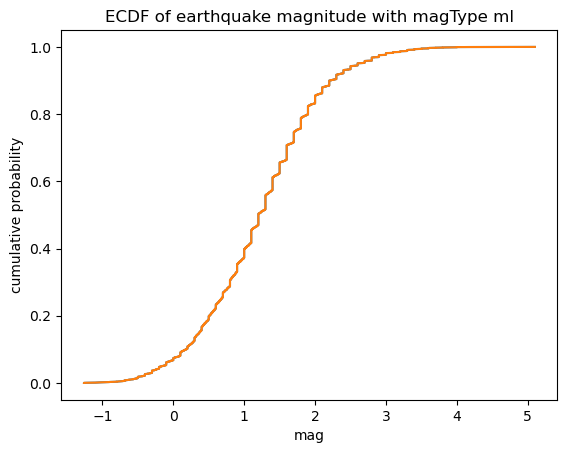

In [215]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')
plt.show()

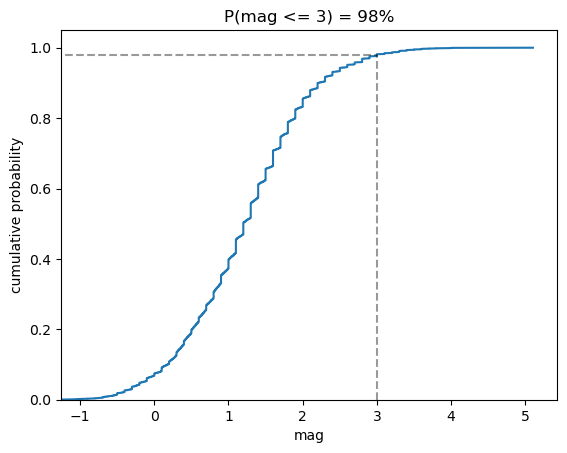

In [217]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
[3, 3], [0, .98], 'k--',
[-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')
plt.show()

### Boxplots

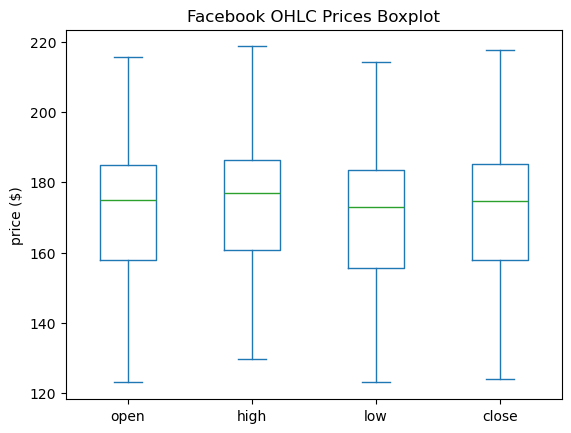

In [220]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

C:\Users\Reuel\AppData\Local\Temp\ipykernel_3036\4100217998.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


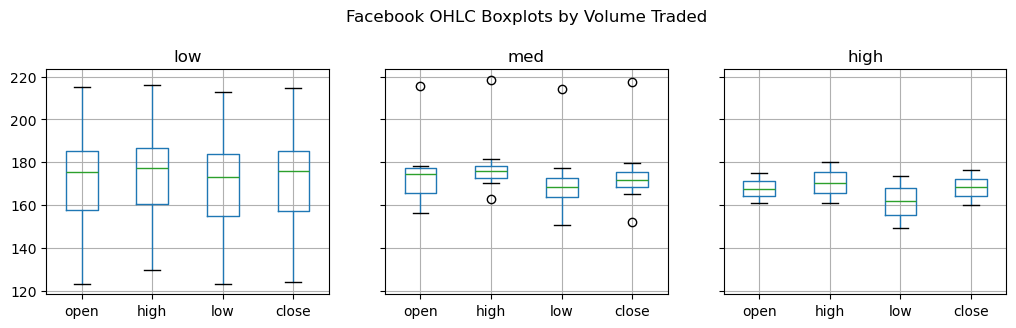

In [222]:
fb.assign(
volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
column=['open', 'high', 'low', 'close'],
layout=(1, 3), figsize=(12, 3)
)

plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)
plt.show()

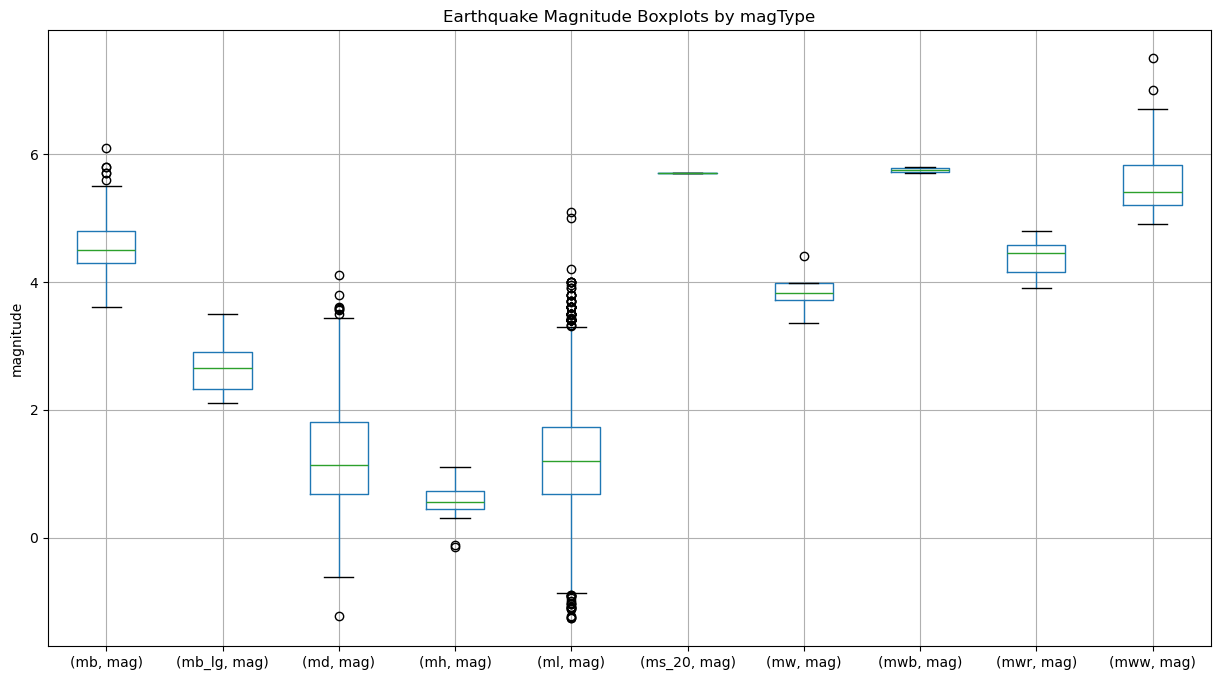

In [228]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
                                                    figsize=(15, 8), subplots=False
                                                    )

plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)
plt.show()

### Counts and frequencies

#### Bar Charts

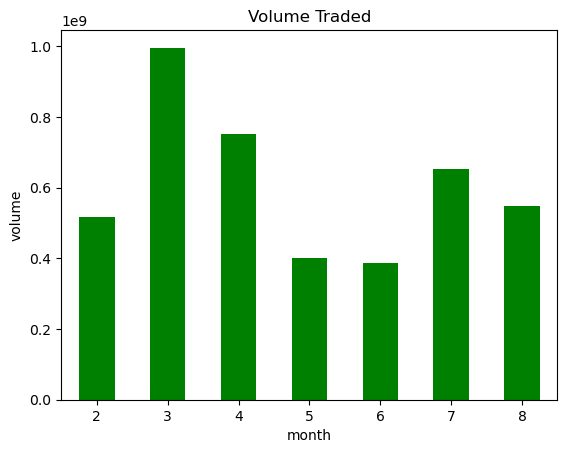

In [234]:
fb['2018-02':'2018-08'].assign(
                            month=lambda x: x.index.month
                            ).groupby('month').sum().volume.plot.bar(
                            color='green', rot=0, title='Volume Traded'
                            )

plt.ylabel('volume') # label the y-axis (discussed in chapter 6)
plt.show()

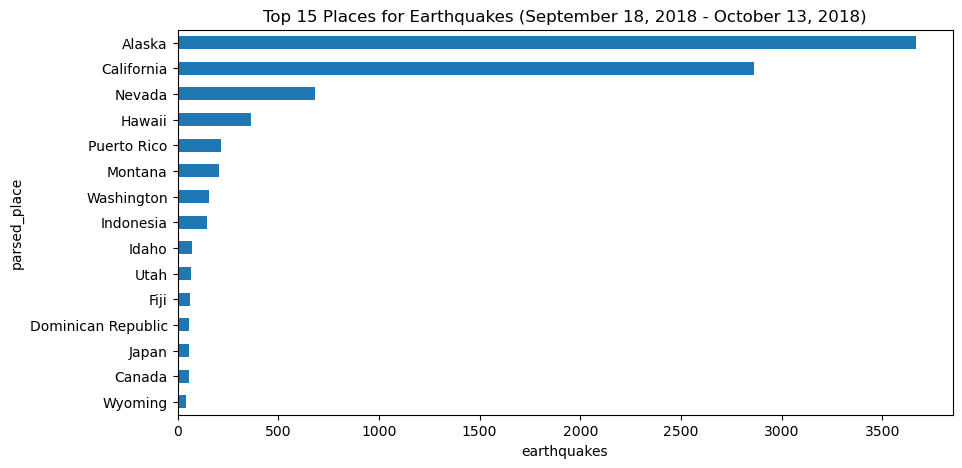

In [240]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
                                                    kind='barh', figsize=(10, 5),
                                                    title='Top 15 Places for Earthquakes '\
                                                    '(September 18, 2018 - October 13, 2018)'
                                                    )

plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)
plt.show()

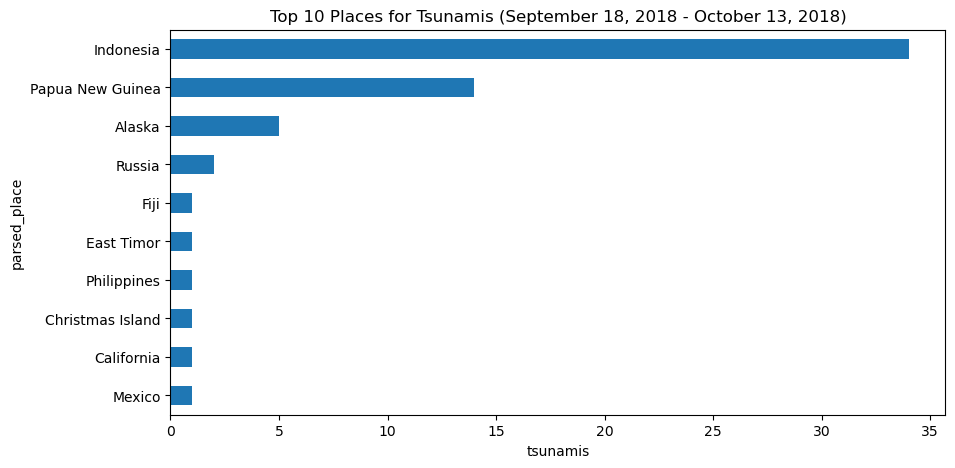

In [242]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
                                                                            kind='barh', figsize=(10, 5),
                                                                            title='Top 10 Places for Tsunamis '\
                                                                            '(September 18, 2018 - October 13, 2018)'
                                                                            )

plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)
plt.show()

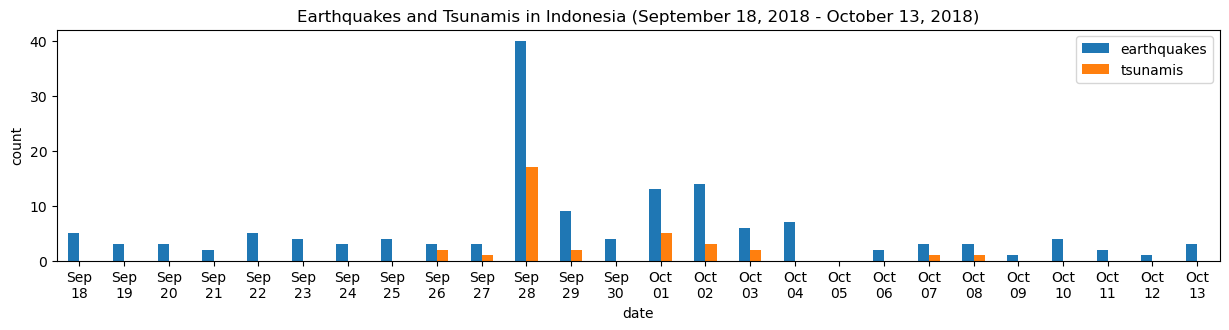

In [248]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
                            time=lambda x: pd.to_datetime(x.time, unit='ms'),
                            earthquake=1
                            ).set_index('time').resample('1D').sum()

indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
                        y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
                        label=['earthquakes', 'tsunamis'],
                        title='Earthquakes and Tsunamis in Indonesia '\
                        '(September 18, 2018 - October 13, 2018)'
                        )

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')
plt.show()

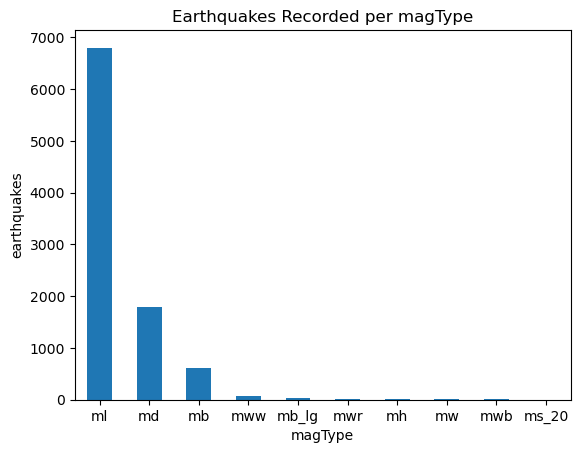

In [250]:
quakes.magType.value_counts().plot(
                                    kind='bar', title='Earthquakes Recorded per magType', rot=0
                                    )

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')
plt.show()

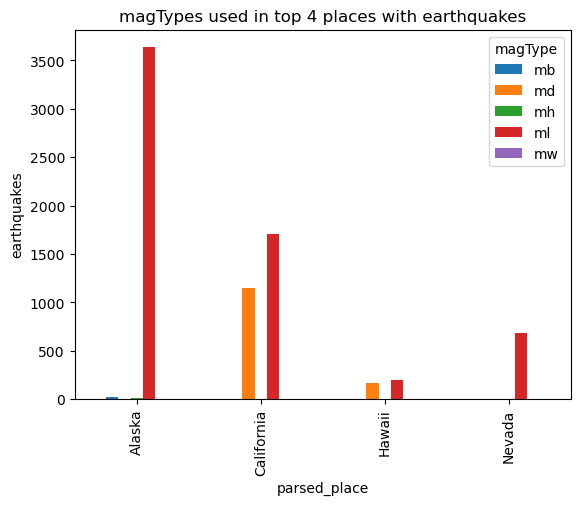

In [252]:
quakes[
        quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
        ].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
        title='magTypes used in top 4 places with earthquakes'
        )
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)
plt.show()

#### Stacked bar chart

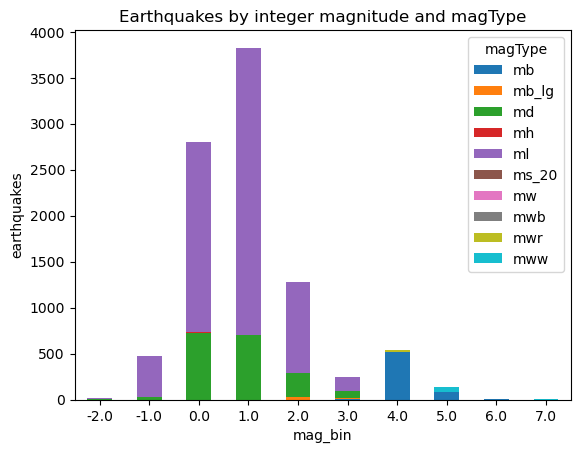

In [259]:
pivot = quakes.assign(
                mag_bin=lambda x: np.floor(x.mag)
                ).pivot_table(
                index='mag_bin', columns='magType', values='mag', aggfunc='count'
                )

pivot.plot.bar(
                stacked=True, rot=0,
                title='Earthquakes by integer magnitude and magType'
                )

plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)
plt.show()

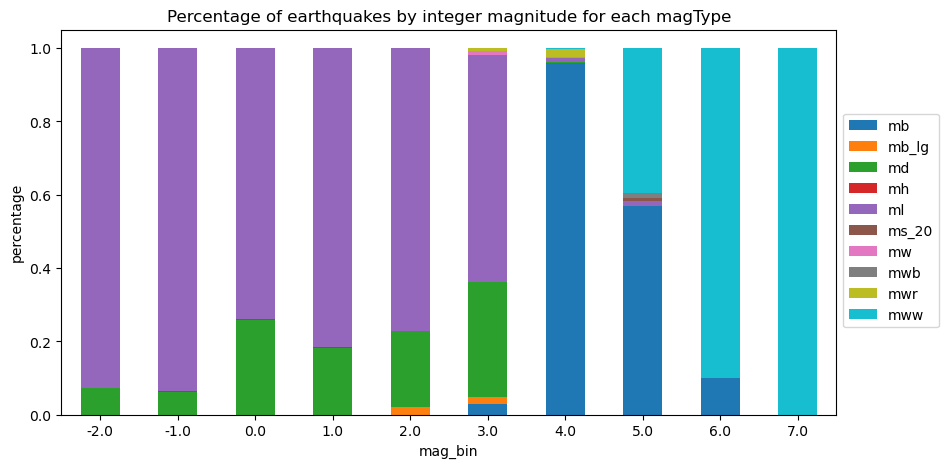

In [261]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)

ax = normalized_pivot.plot.bar(
                                stacked=True, rot=0, figsize=(10, 5),   
                                title='Percentage of earthquakes by integer magnitude for each magType'
                                )

ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)
plt.show()

## 9.3 Pandas Plotting Subpackage

### Scatter matrix

In [267]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
                'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
                )

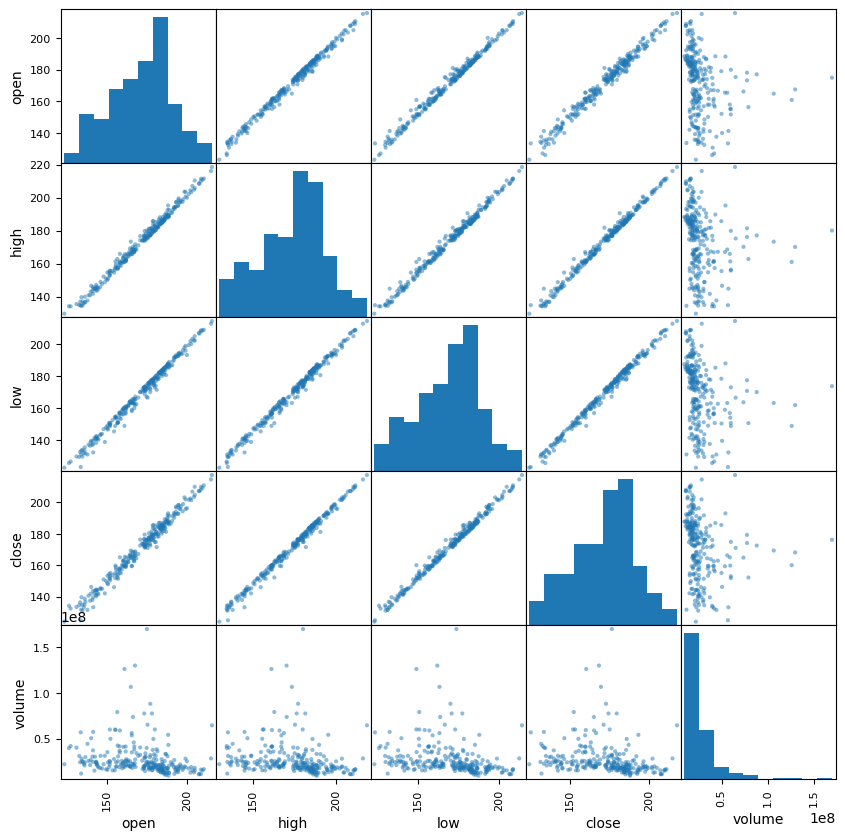

In [273]:
from pandas.plotting import scatter_matrix

scatter_matrix(fb, figsize=(10, 10))
plt.show()

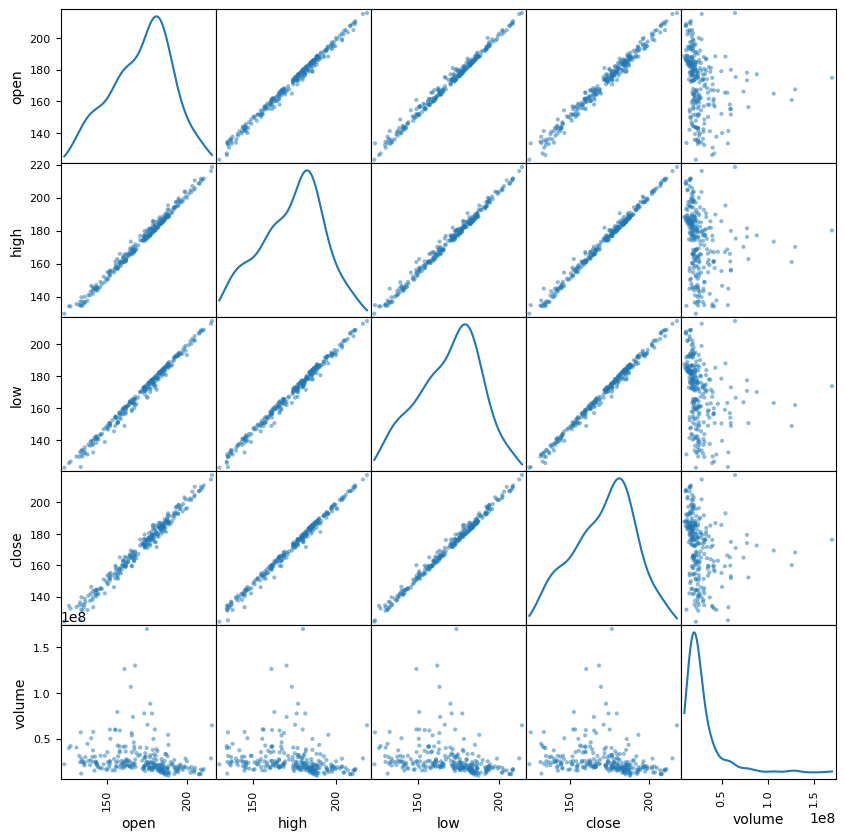

In [279]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')
plt.show()

### Lag plot

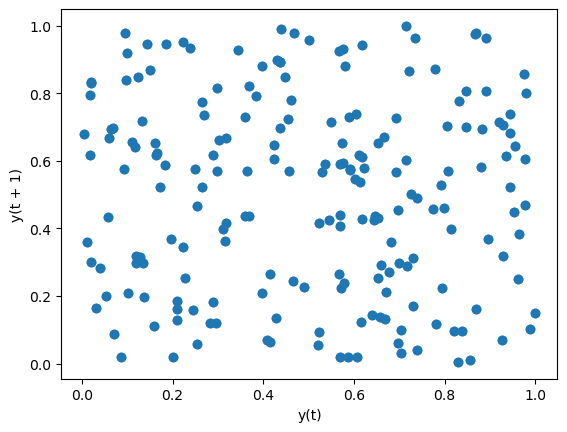

In [284]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))
plt.show()

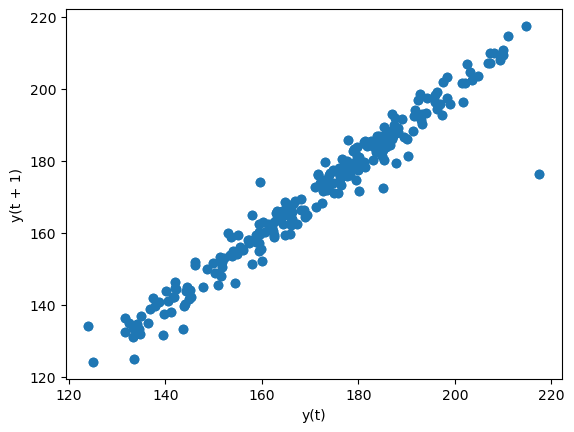

In [288]:
lag_plot(fb.close)
plt.show()

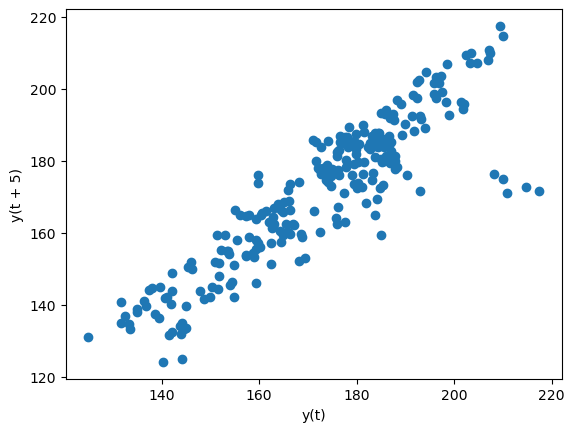

In [290]:
lag_plot(fb.close, lag=5)
plt.show()

### Autocorrelation plots




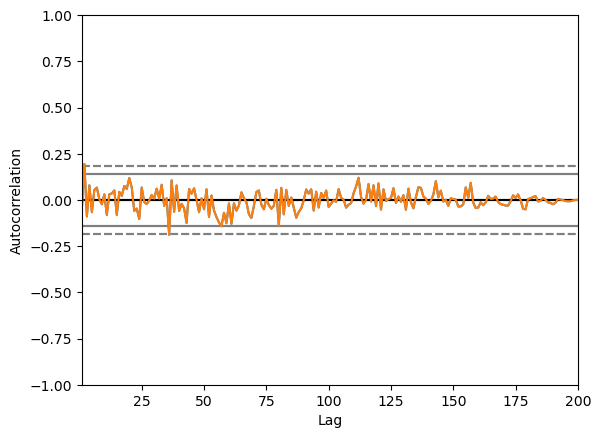

In [295]:
from pandas.plotting import autocorrelation_plot

np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()

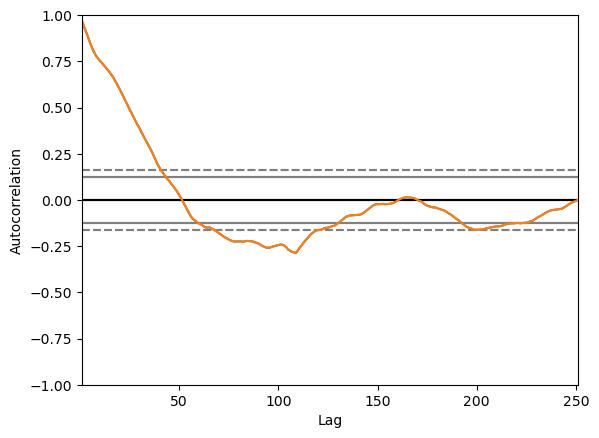

In [299]:
autocorrelation_plot(fb.close)
plt.show()

### Bootstrap plot

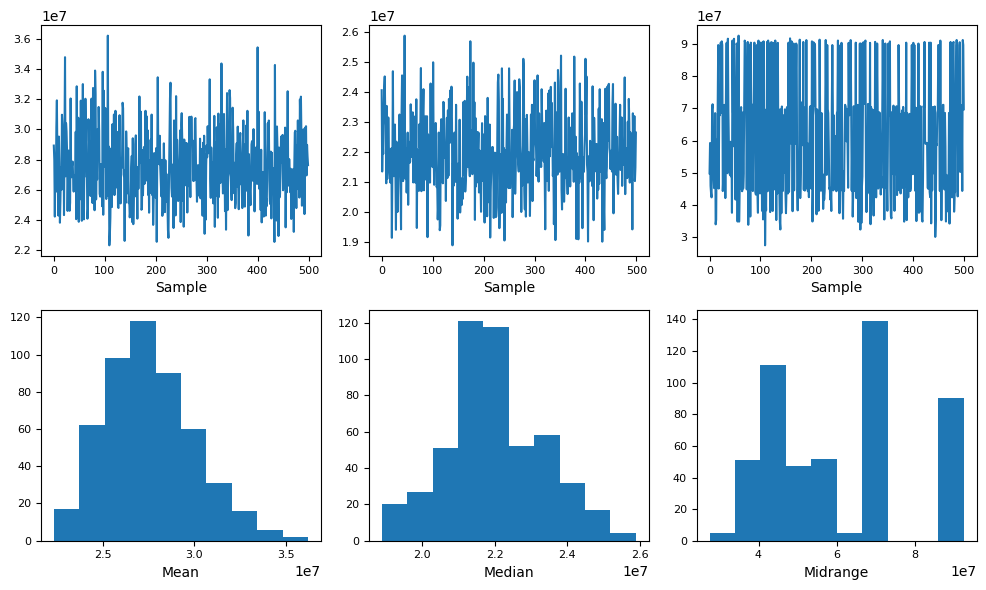

In [306]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

plt.show()

# Data Analysis

In 9.1, the outputs in the procedures are about line plots, scatterplots and histograms. These plots are used to get the relationship between two variables(lineplots and scatterplots) and frequency (Histograms). Further, subplots were created in this part wherein it tells me how to create subplots and other ways on creating it.

In 9.2, similarly as 9.1, lineplots and subplots are created in this module to teach us the alternatives in plotting the data. However, I learned an important lesson which is using alpha. It is a great way to overlap two plots in one figure and showing both the outputs at the same time clearly.

In 9.3, the outputs are all about advanced plotting techniques like lag plot, autocorrelation plot, and bootstrap plot.

# Supplementary Activity

In [385]:
import pandas as pd

facebook = pd.read_csv('data/fb_stock_prices_2018.csv') # create a dataframe for facebook stocks

In [472]:
earthquake =  pd.read_csv('data/earthquakes-1.csv')   # create a dataframe for earthquake

## 1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [387]:
facebook.head(3)

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896


In [536]:
facebook.dtypes #check the types of the column

open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Change in Open and Close    float64
dtype: object

In [389]:
facebook.date = facebook.date.apply(pd.to_datetime)  # convert the date to datetime

In [391]:
facebook.set_index('date', inplace=True) # set the index to date

In [393]:
facebook.sort_index().head(3)            # sort by the index

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896


In [403]:
fb_rolling = facebook.rolling('20D').agg({'close' : 'min'}) # rolling 20-day minimum of the Facebook closing price
fb_rolling.head(3)

,close
date,
2018-01-02,181.42
2018-01-03,181.42
2018-01-04,181.42


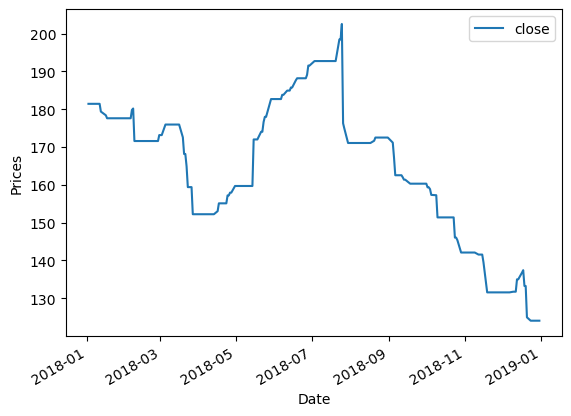

In [417]:
fb_rolling.plot(kind = 'line')       # output the rolling with the use of line plot

# x and y labels
plt.ylabel('Prices') 
plt.xlabel('Date')
plt.show()

From the plot, we can see that the price of closing stocks is at the highest in between 2018-07 and 2018-09. It started to trend down after the peak and it is at the lowest after 2019-01.

## 2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

In [436]:
def diff(x):
    return x['open'] - x['close']           #calculate the change from opet to close

facebook['Change in Open and Close'] = facebook.apply(lambda x: diff(x), axis = 1) # get all the row values using the axis = 1
facebook.head(3)

,open,high,low,close,volume,Change in Open and Close
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,-3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,-2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,0.57


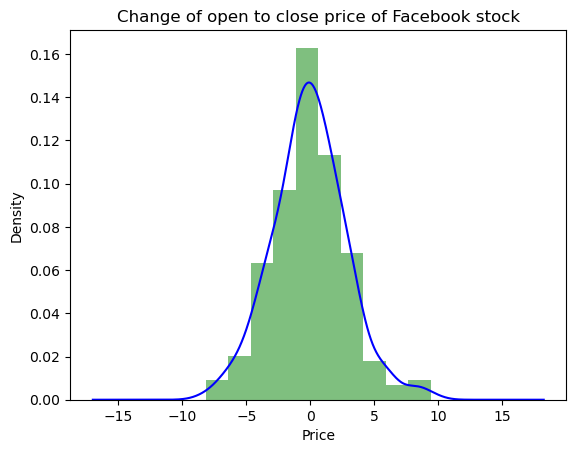

In [661]:
#do one plot first then plot another to do an overlap
hist = facebook['Change in Open and Close'].plot(kind='hist', density=True, alpha=0.5, color= 'green')

facebook['Change in Open and Close'].plot(
            ax=hist, kind='kde', color='blue',
            title='Change of open to close price of Facebook stock'
            )

plt.xlabel('Price') # label the x-axis
plt.show()

from the plot we can see that the difference between max and min is densest at the 0.

## 3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [474]:
earthquake.head(3)

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California


In [538]:
earthquake.dtypes #check the datatyopes

mag             float64
magType          object
time              int64
place            object
tsunami           int64
parsed_place     object
dtype: object

In [517]:
eq_p = earthquake.query('parsed_place == "Indonesia"').pivot(columns = 'magType', values = 'mag')  # pivot the table in the column magType to extract 
                                                                                                         # each magtype also search for indonesia only
eq_p

magType,mb,ms_20,mwr,mww
9,4.7,NaN,NaN,NaN
13,4.5,NaN,NaN,NaN
180,NaN,NaN,NaN,5.2
421,4.7,NaN,NaN,NaN
660,4.4,NaN,NaN,NaN
...,...,...,...,...
9041,4.3,NaN,NaN,NaN
9075,4.4,NaN,NaN,NaN
9108,4.0,NaN,NaN,NaN
9209,4.7,NaN,NaN,NaN


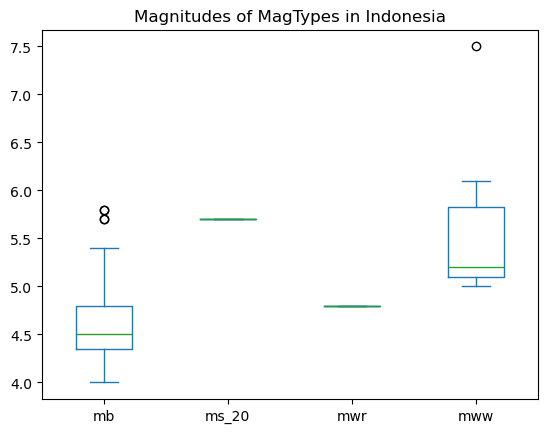

In [523]:
eq_p.iloc[:, :].plot(kind = 'box', title = 'Magnitudes of MagTypes in Indonesia') # select all columns and boxplot it
plt.show()

From the boxplot, the 50% of the magnitude with the category mb lies between estimatedly 4.4 to 4.7. While ms_20 and mwr are at estimatedly 5.7 and 4.8 respectively. The 50% of the magnitude of mww category lies between estimatedly at 5.0 to 6.0.

## 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

In [526]:
facebook.head(3)

,open,high,low,close,volume,Change in Open and Close
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,-3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,-2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,0.57


In [557]:
def max_min(x):                              # Function to calculate the difference
    return x['high'] - x['low'] 

In [551]:
fb4 = facebook.resample('W').agg({'high' : 'max', 'low': 'min'}) # resample the data to weekly then use agg function to calculate the max and min
fb4.head(3)

,high,low
date,,
2018-01-07,186.90,177.55
2018-01-14,188.90,177.40
2018-01-21,182.37,175.80


In [561]:
fb4['max_min'] = fb4.apply(lambda x: max_min(x), axis = 1) # calculate the difference with the function created
fb4.head(3)

,high,low,max_min
date,,,
2018-01-07,186.90,177.55,9.35
2018-01-14,188.90,177.40,11.50
2018-01-21,182.37,175.80,6.57


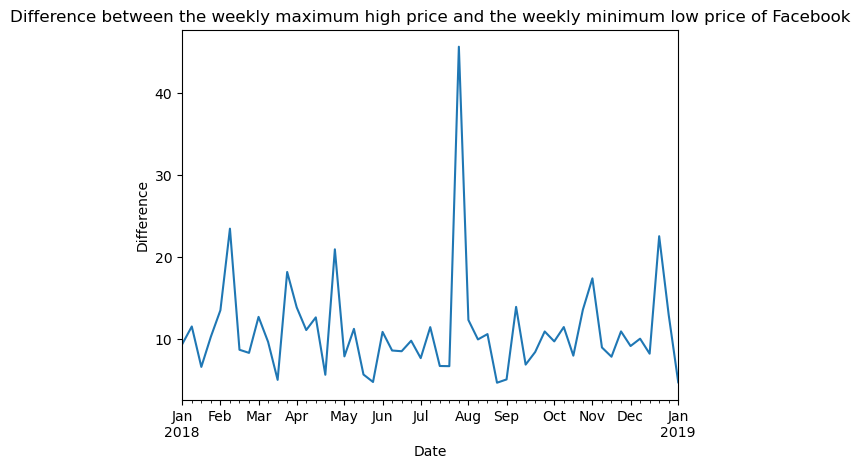

In [579]:
# select the column of max_min and plot it with lineplot
fb4.loc[:,'max_min'].plot(kind = 'line', title = 'Difference between the weekly maximum high price and the weekly minimum low price of Facebook')

plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

From the line plot, we can see that the Difference is at the highest in August while the lowest difference is at september.

## 5.Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

The second subplot will be a bar plot showing the net effect this had monthly, using resample().



Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [652]:
import matplotlib.pyplot as plt
import pandas as pd

facebook['difference'] = facebook['open'] - facebook['close'].shift()        # find the difference day's opening price and the prior day's closing price using shift() (n = 1 by default)
facebook_monthly = facebook.resample('ME').sum()                          #resample the data based on monthly                           

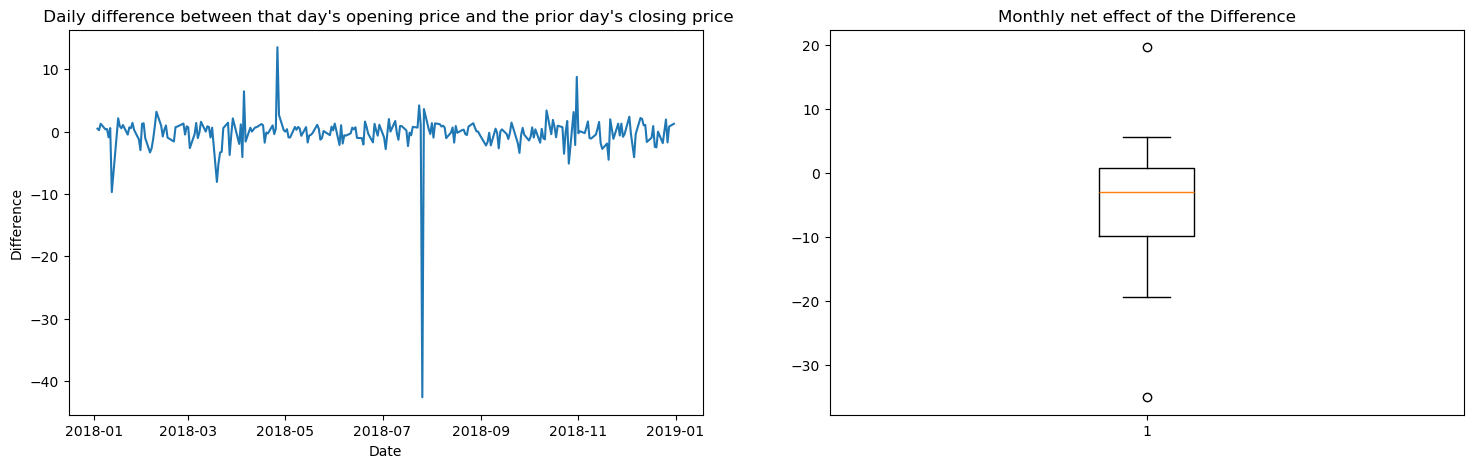

In [654]:

# create 1 row and 2 columns for the plots and create a 18x5 figure for the canvas of the plots
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].plot(facebook['difference'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Difference')
ax[0].set_title(" Daily difference between that day's opening price and the prior day's closing price")

ax[1].boxplot(facebook_monthly['difference'])
ax[1].set_title('Monthly net effect of the Difference')

plt.show()

As we can see from the line plot, the highest difference is at 2018-05 while the lowest differece is at between 2018-07. In the boxplot, we can see that the the 3rd quartile is slightly above 0 and the 1st quartile is at -10. The 50% of the data lies between -10 to 0.

# Conclusion

In this lab activity, I learned how to do data visualizations using Matplotlib and Pandas.plot(). I was able to learn the plot componenets in matplotlib and
now I understand how to do subplots. Furthermore, in the context of the ETL pipeline, I was able to connect the importance of cleaning the data before analyzation. 
I learned the uses of merge, pivot, groupby and etc for preaparation of visual analyzation. 